In [1]:
# from Engine_config import Engine
from Engine_UE2_config import Engine


engine = Engine()

['nyu_tandon']
bbox_lat: [40.69012764197041, 40.699120858029595]
bbox_long: [-73.99156687083165, -73.97970552916836]
address: 5 MetroTech Center, Brooklyn, NY 11201
descr: NYU Tandon campus


2025-06-16 13:43:45 WARN wrk7 [HDRFilm] Monochrome mode enabled, setting film output pixel format to 'luminance' (was rgb).

no-name-1      itu_marble
ground         itu_concrete


In [2]:
# rate_15, rate_35, N_measure = engine.run_from_file('routes.json')
# rate_total, hp_total = engine.run_from_file('routes/routes_seed42_1200s.json')
rate_total, hp_total, orientation_total = engine.run_from_file('routes/ue2_s2_1_10mps_routes_seed42_1200s.json')
# rate_total, hp_total, orientation_total = engine.run_from_file('routes/ue2_10mps_routes_seed40_1200s.json')
# rate_total
hp_total

  2%|▏         | 487/24000 [01:34<1:22:28,  4.75it/s]/home/dev/miniconda3/envs/siona_conda/lib/python3.10/site-packages/drjit/ast.py:838: RuntimeWarning: The AST-transforming decorator @drjit.syntax was called more than 1000 times by your program. Since transforming and recompiling Python code is a relatively expensive operation, it should not be used within loops or subroutines. Please move the function to be transformed to the top program level and decorate it there.
  warnings.warn(
 11%|█▏        | 2707/24000 [12:05<1:28:16,  4.02it/s]/home/dev/Haozhe/Ruibin_sionna/Random_engine/Engine_UE2_config.py:438: RuntimeWarning: divide by zero encountered in log10
  return 10.0 * np.log10(linear_values)
100%|██████████| 24000/24000 [2:17:17<00:00,  2.91it/s]  


[[8.884435409584057e-10,
  5.69060770727603e-11,
  2.498005136075676e-09,
  7.14967498538499e-08],
 [8.498230452680389e-10,
  5.963118887564178e-11,
  2.4852853108825457e-09,
  7.120296885432253e-08],
 [9.052820715282905e-10,
  5.5537876381128726e-11,
  2.4645314677940178e-09,
  7.068769036777667e-08],
 [9.438615444778975e-10,
  5.2993012755742086e-11,
  2.467688275942237e-09,
  7.085414210905583e-08],
 [9.8159547157195e-10,
  5.094857175036438e-11,
  2.477234417597174e-09,
  7.092199183489356e-08],
 [1.0669130023899243e-09,
  4.620084870232688e-11,
  2.4974557977230916e-09,
  7.123516354567982e-08],
 [1.142767991346716e-09,
  4.1966197877885136e-11,
  2.4793767039454906e-09,
  7.086567421765722e-08],
 [1.1424294843465077e-09,
  4.2126312854717796e-11,
  2.4992901082043772e-09,
  7.124536693936534e-08],
 [1.0848797415974332e-09,
  4.48450616918894e-11,
  2.5132929071247645e-09,
  7.15641874649009e-08],
 [1.0339207268117434e-09,
  4.79511395867771e-11,
  2.506097551702169e-09,
  7.15177

In [3]:
import json

with open('51_s2_rate_10mps_seed40_1200s.json', 'w') as f:
    json.dump(rate_total, f)
    
with open('51_s2_hgain_10mps_seed40_1200s.json', 'w') as f:
    json.dump(hp_total, f)

In [ ]:
import numpy as np
import json

# with open('results/rate_random_seed42_1200s.json', 'r') as f:
#     loaded_routes = json.load(f)

with open('results_practical/51_s2_rate_10mps_seed40_1200s.json', 'r') as f:
    loaded_routes = json.load(f)

rate_total = np.array(loaded_routes)
rate_total

array([[960.        , 960.        , 480.        , 480.        ],
       [960.        , 960.        , 480.        , 480.        ],
       [960.        , 960.        , 480.        , 480.        ],
       ...,
       [776.48564856,   0.        ,  84.98618255, 480.        ],
       [806.53201229,   0.        , 100.92613026, 480.        ],
       [761.95978711,   0.        , 131.27218012, 480.        ]])

In [3]:
N_measure = len(rate_total)
N_measure 

24000

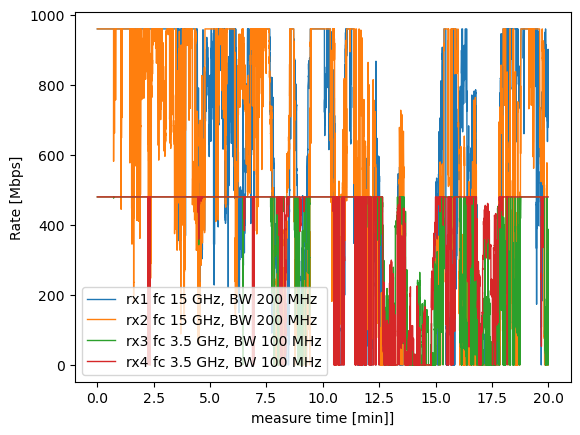

In [4]:
measure_index = range(N_measure)
messuare_period = 0.05

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot rate
plt.figure()

plt.plot(np.array(measure_index) * messuare_period / 60, rate_total[:,0], label=f"rx1 fc 15 GHz, BW 200 MHz", linewidth=1)
plt.plot(np.array(measure_index) * messuare_period / 60, rate_total[:,1], label=f"rx2 fc 15 GHz, BW 200 MHz", linewidth=1)
plt.plot(np.array(measure_index) * messuare_period / 60, rate_total[:,2], label=f"rx3 fc 3.5 GHz, BW 100 MHz", linewidth=1)
plt.plot(np.array(measure_index) * messuare_period / 60, rate_total[:,3], label=f"rx4 fc 3.5 GHz, BW 100 MHz", linewidth=1)
# plt.plot(np.array(measure_index) * messuare_period / 60, rate_35, label=f"fc 3.5 GHz, BW 100 MHz")
plt.legend(loc = "lower left")
plt.xlabel("measure time [min]]")
plt.ylabel("Rate [Mbps]")
# plt.ylim(-75,-60)
plt.show()

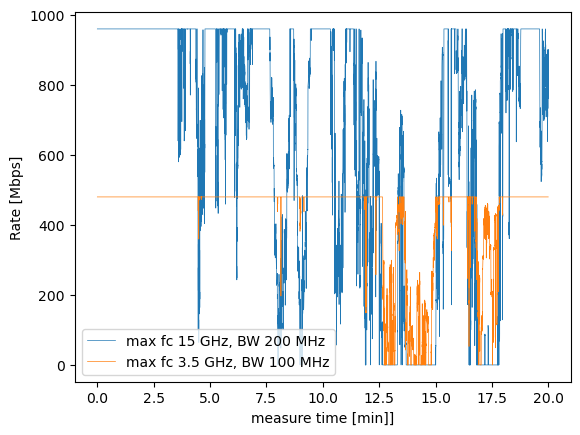

In [5]:
max_15 = np.max(rate_total[:,:2], axis = 1)
max_35 = np.max(rate_total[:,2:4], axis = 1)
 

# plot rate
plt.figure()

plt.plot(np.array(measure_index) * messuare_period / 60, max_15, label=f"max fc 15 GHz, BW 200 MHz", linewidth=0.5)
plt.plot(np.array(measure_index) * messuare_period / 60, max_35, label=f"max fc 3.5 GHz, BW 100 MHz", linewidth=0.5)

plt.legend()
plt.xlabel("measure time [min]]")
plt.ylabel("Rate [Mbps]")
# plt.ylim(-75,-60)
plt.show()